Modelo de Score de Crédito

O intuito desse projeto e fazer uma análise exploratória nos dados de pessoas de exemplo e seus respectivos score de crédito.
Primeiramente será feito um processo de limpeza dos dado, depois um processo de normalização, treinamento do modelo e teste do mesmo.
No fim será criado uma forma bem simples de imputar novos dados para tentar prever o score de outras pessoas.

In [59]:
#Importar arquivos, analisar dados, tratar dados, entre outras funcionalidades.
import pandas as pd

#Plotar gráficos
import matplotlib.pyplot as plt

#Visualizações mais robustas do que o Matplotlib
import seaborn as sns

#Trabalhar com números de forma em geral
import numpy as np

#filtrar alguns avisos
import warnings
warnings.filterwarnings("ignore") 

from sklearn.model_selection import train_test_split #Separar dados de treino e teste
from sklearn.preprocessing import StandardScaler #Fazer a normalização dos dados
from sklearn.preprocessing import MinMaxScaler #Fazer a normalização dos dados
from sklearn.preprocessing import LabelEncoder #Fazer o OneHotEncoding
from sklearn.linear_model import LinearRegression #Algoritmo de Regressão Linear
from sklearn.metrics import r2_score #Medir a acurácia do modelo preditivo


In [60]:
#Exibir todas colunas do arquivo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Importação dos dados

In [61]:
#Comando para importar e transformar os dados em um DataFrame
df_dados = pd.read_excel("dados_credito.xlsx")

In [62]:
df_dados.head(10)

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
0,1,SP,19,Superior Cursando,Solteiro,0,Não,0,0,Não,0,8,Sim,1800,0,0,12.000000
1,2,MG,23,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
2,3,SC,25,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
3,4,PR,27,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
4,5,RJ,28,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
5,6,SP,30,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667
6,7,MG,32,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,6800,0,0,45.166667
7,8,SC,35,Superior Completo,Solteiro,1,Sim,2,450000,Sim,2400,25,Sim,22000,1,150000,50.666667
8,9,PR,42,Segundo Grau Completo,Casado,0,Não,0,0,Não,0,48,Sim,4500,2,28000,56.166667
9,10,RJ,45,Superior Cursando,Casado,0,Não,0,0,Não,0,120,Não,9800,0,0,61.666667


Verificando se não existem problemas no fim da base de dados, como um rodapé ou algo do tipo

In [63]:
df_dados.tail()

,CODIGO_CLIENTE,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10471,10472,PR,51,Superior Completo,Solteiro,1,Não,0,0,Não,0,9,Não,4800,1,50000,18.000000
10472,10473,SP,48,Segundo Grau Completo,Casado,0,Sim,1,220000,Não,0,18,Sim,2200,2,30000,23.000000
10473,10474,RJ,51,Superior Cursando,Casado,1,Sim,0,0,Não,0,22,Não,3900,0,0,28.666667
10474,10475,RJ,48,Superior Completo,Divorciado,2,Não,1,370000,Não,0,30,Sim,NaN,1,35000,34.166667
10475,10476,PR,51,Segundo Grau Completo,Divorciado,0,Não,0,0,Não,0,14,Sim,3100,2,40000,39.666667


In [64]:
#Verificando informações sobre as variáveis, como tipo de dado, quantidade de registro, se existem nulos...
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO_CLIENTE              10476 non-null  int64  
 1   UF                          10476 non-null  object 
 2   IDADE                       10476 non-null  int64  
 3   ESCOLARIDADE                10476 non-null  object 
 4   ESTADO_CIVIL                10476 non-null  object 
 5   QT_FILHOS                   10476 non-null  int64  
 6   CASA_PROPRIA                10476 non-null  object 
 7   QT_IMOVEIS                  10476 non-null  int64  
 8   VL_IMOVEIS                  10476 non-null  int64  
 9   OUTRA_RENDA                 10476 non-null  object 
 10  OUTRA_RENDA_VALOR           10476 non-null  int64  
 11  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 12  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 13  ULTIMO_SALARIO              104

A variável CODIGO_CLIENTE pode ser excluída por não ter utilidade para o modelo.
As variáveis UF, ESCOLARIDADE CASA_PROPRIA, OUTRA_RENDA, TRABALHANDO ATUALMENTE e ESTADO CIVIL precisarão passar pelo processo de OneHotCoding para poderem ser usadas no modelo.
A variável ULTIMO_SALARIO precisará ter seu tipo de dados alterados de string para numérica

In [65]:
#Excluindo variável CODIGO_CLIENTE
df_dados.drop('CODIGO_CLIENTE', axis=1, inplace=True)

In [66]:
#Agrupando dados referente a variável último salário para entender a distribuição dos valores
df_dados.groupby(['ULTIMO_SALARIO']).size()

ULTIMO_SALARIO
1800         846
2200         792
3100         792
3900         792
4500         468
4800         792
5300         522
6100         522
6800         611
9000         522
9800         468
11500        790
13000        522
15000        522
17500        522
18300        522
22000        468
SEM DADOS      1
dtype: int64

Após agrupar os dados para entender melhor a distribuição pode-se observar que existe um registro em uma coluna que irá ser numérica como "SEM DADOS", isso força com que o tipo da coluna se torne uma string, será necessário tratar esse dado antes de alterar o tipo da coluna.

In [67]:
#Listando esse registro em específico
df_dados.loc[df_dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
10459,RJ,45,Superior Cursando,Solteiro,1,Sim,1,185000,Sim,3000,19,Sim,SEM DADOS,0,0,45.166667


Existem algumas alternativas para essa situação, algumas são: exclusão do registro, tratar o registro com métodos estatísticos e manter o registro, dentre diversas outras. Para essa situação em específico optei por tratar o registro e mantê-lo.

In [68]:
#Substituindo o registro que está como "SEM DADOS" por nulo
df_dados.replace('SEM DADOS', np.nan, inplace = True)

In [69]:
#Verificando se existe algum registro com problema
df_dados.loc[df_dados['ULTIMO_SALARIO'] == 'SEM DADOS']

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE


In [70]:
#Convertendo a coluna em float
df_dados['ULTIMO_SALARIO'] = df_dados['ULTIMO_SALARIO'].astype(np.float64)

In [71]:
#verificando a existencia de nulos
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                3
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

Existem alguns registros que possuem a variável ULTIMO_SALARIO como null

In [72]:
#Inserindo a mediana (pois distorce menos para essa situação) dos dados para os registros null para preservar os dados
df_dados['ULTIMO_SALARIO'] = df_dados ['ULTIMO_SALARIO'].fillna((df_dados['ULTIMO_SALARIO'].median()))

In [73]:
#Verificando se ainda existem registros null
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
dtype: int64

In [74]:
#Verificando de todas as variáveis estão com tipo de dado correto
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10476 non-null  object 
 1   IDADE                       10476 non-null  int64  
 2   ESCOLARIDADE                10476 non-null  object 
 3   ESTADO_CIVIL                10476 non-null  object 
 4   QT_FILHOS                   10476 non-null  int64  
 5   CASA_PROPRIA                10476 non-null  object 
 6   QT_IMOVEIS                  10476 non-null  int64  
 7   VL_IMOVEIS                  10476 non-null  int64  
 8   OUTRA_RENDA                 10476 non-null  object 
 9   OUTRA_RENDA_VALOR           10476 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10476 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10476 non-null  object 
 12  ULTIMO_SALARIO              10476 non-null  float64
 13  QT_CARROS                   104

In [75]:
#Analisando medidas estatÍsticas do conjunto 
df_dados.describe()

,IDADE,QT_FILHOS,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
count,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000,10476.000000
mean,41.054124,1.122566,0.847079,238453.608247,641.237113,43.070447,8286.531119,0.936426,40996.563574,51.058706
std,13.878162,1.113537,0.957374,265843.934416,1295.978195,40.851521,5826.589775,0.806635,47404.214062,27.306340
min,19.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1800.000000,0.000000,0.000000,12.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,14.000000,3900.000000,0.000000,0.000000,28.666667
50%,42.000000,1.000000,1.000000,185000.000000,0.000000,22.000000,6100.000000,1.000000,35000.000000,45.166667
75%,53.000000,2.000000,1.000000,370000.000000,0.000000,75.000000,11500.000000,2.000000,50000.000000,72.666667
max,65.000000,42.000000,3.000000,900000.000000,4000.000000,150.000000,22000.000000,2.000000,180000.000000,98.000000


Avaliando a existência de outliers das colunas que são numéricas
(Outliers são valores discrepantes para variáveis numéricas)

In [76]:
#Separando em uma lista as variáveis numéricas
variaveis_numericas = []
for i in df_dados.columns[0:17].tolist():
      if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':
          print(i, ':' , df_dados.dtypes[i])
          variaveis_numericas.append(i)

IDADE : int64
QT_FILHOS : int64
QT_IMOVEIS : int64
VL_IMOVEIS : int64
OUTRA_RENDA_VALOR : int64
TEMPO_ULTIMO_EMPREGO_MESES : int64
ULTIMO_SALARIO : float64
QT_CARROS : int64
VALOR_TABELA_CARROS : int64
SCORE : float64


Gerando todos os boxplot com as variáveis numéricas de uma só vez


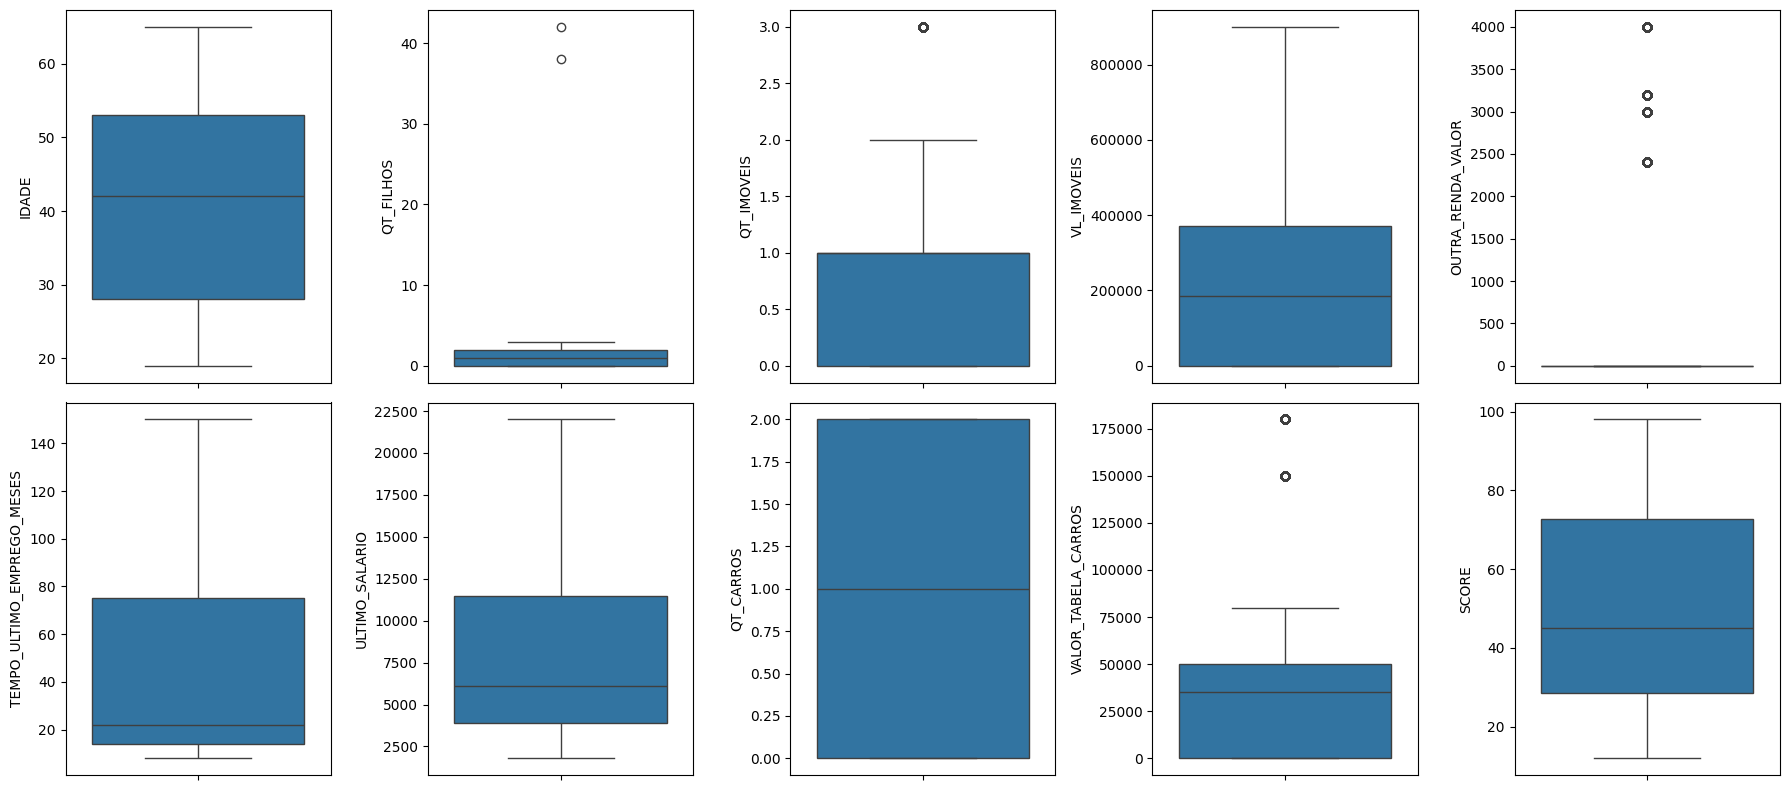

In [77]:
#Definindo tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [18.00, 8.00]
plt.rcParams["figure.autolayout"] = True

#Definindo em quantas linhas e colunas os gráficos serão exibidos
f, axes = plt.subplots(2,5) # 2 linhas e 5 duas colunas
linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1 
    if coluna == 5:
        linha +=1
        coluna =0
plt.show()

Temos as seguintes considerações. 
- QT_FILHOS = existem alguns registros que possuem entre 30 e 45 filhos, o que é bastante improvável, o que torna essa dado um outlier.
- QT_IMOVEIS = existem alguns registros que possuem mais de 3 imoveis, o que é bem distante da maioria da população da base que tem no máximo 2, mas não se torna um outlier, pois de fato uma pessoa pode ter 3 imoveis.
- OUTRA_RENDA_VALOR = os pontos mais distantes não são outlier, pois as pessoas podem ter outra renda mesmo a maioria da base não tendo.
- VALOR_TABELA_CARROS = também não é um outlier pois a pessoa realmente pode possuir um carro com a preço de tabela de mais de 175K.

In [78]:
#Filtrando registros com mais de 4 filhos
df_dados.loc[df_dados['QT_FILHOS'] > 4]

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE
27,SP,48,Superior Completo,Divorciado,38,Sim,2,600000,Não,0,15,Sim,15000.0,1,70000,67.166667
10455,SP,45,Segundo Grau Completo,Casado,42,Sim,1,220000,Não,0,18,Sim,2200.0,2,30000,23.000000


Como uma tratativa diferente da adotada em outro momento da análise exploratória irei excluir os registros que possuem outlier na variável QT_FILHOS.

In [79]:
#Removendo os dois registro da base
df_dados.drop(df_dados.loc[df_dados['QT_FILHOS'] > 4].index, inplace=True)

Por preciosismo irei verificar as outras variáveis que apresentaram um possível outlier no boxplot

In [80]:
df_dados.groupby(['OUTRA_RENDA_VALOR']).size()

OUTRA_RENDA_VALOR
0       8350
2400     468
3000     612
3200     522
4000     522
dtype: int64

In [81]:
df_dados.groupby(['VALOR_TABELA_CARROS']).size()

VALOR_TABELA_CARROS
0         3762
28000      468
30000      791
35000      792
40000      792
48000      522
50000     1314
70000      521
80000      522
150000     468
180000     522
dtype: int64

In [82]:
df_dados.groupby(['QT_IMOVEIS']).size()

QT_IMOVEIS
0    4680
1    3761
2     989
3    1044
dtype: int64

Outra forma de verificar a distribuição desses valores e por um histograma e para facilitar irei plotar todas as variáveis de interesse de uma só vez assim como foi feito com os boxplots.
Com ele será possível avaliar se as variáveis estão numa variação normal e quais as distâncias

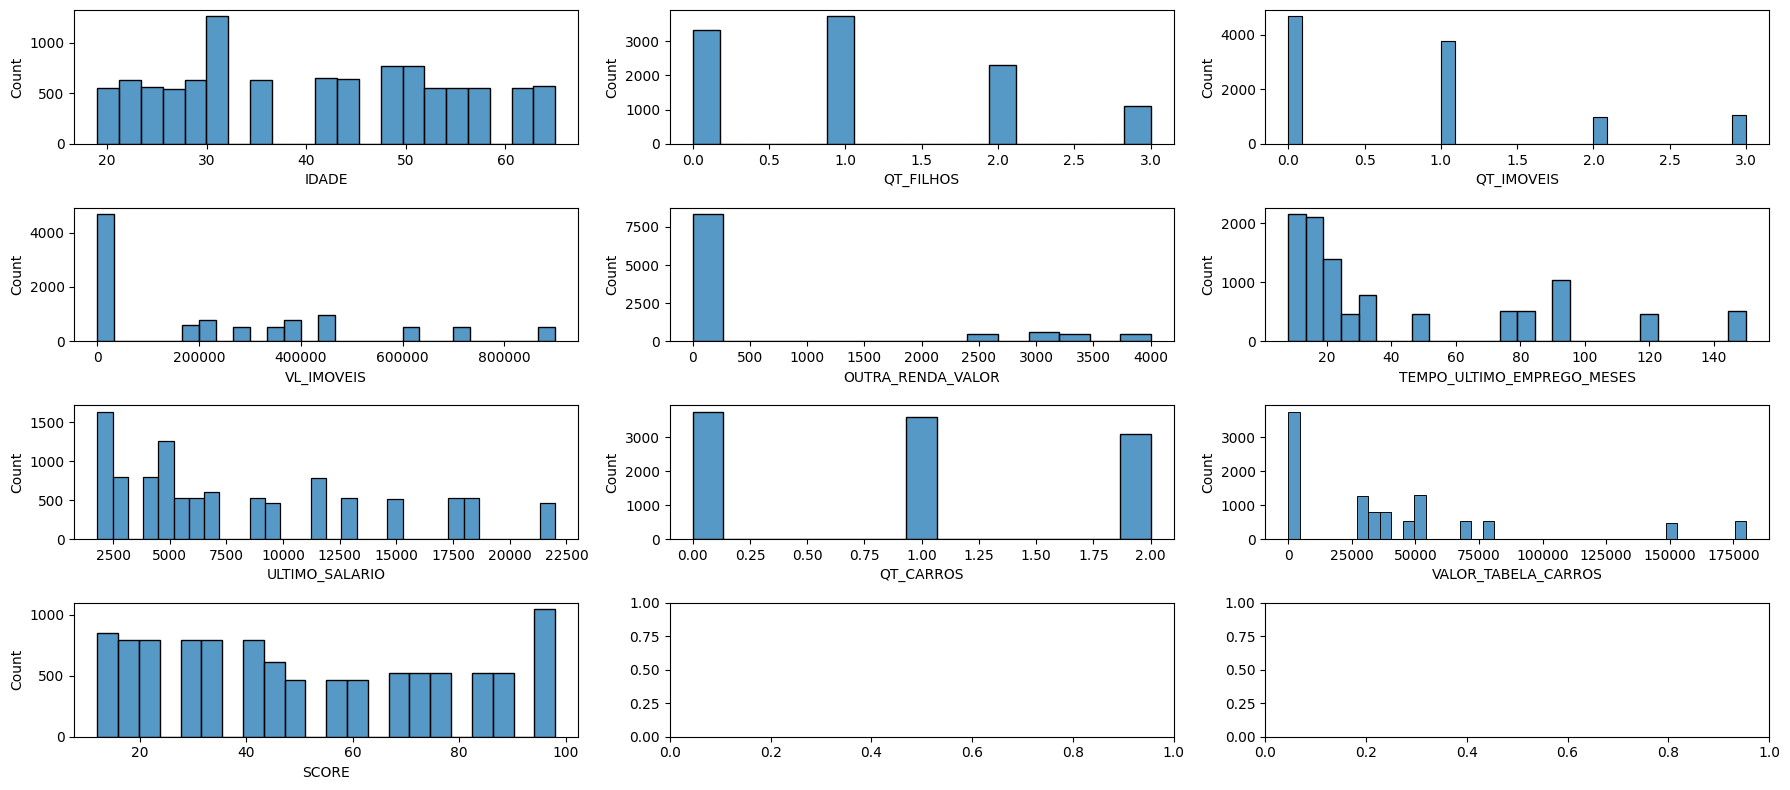

In [83]:
plt.rcParams["figure.figsize"] = [18.00, 8.00]
plt.rcParams["figure.autolayout"] = True

f, axes = plt.subplots(4,3)

linha = 0 
coluna = 0

for i in variaveis_numericas:
    sns.histplot(data = df_dados, x=i, ax=axes[linha][coluna])
    coluna+=1
    if coluna == 3:
       linha +=1
       coluna = 0
plt.show()

É possível notar uma distribuição bastante irregular entre as variáveis, com isso será necessário executar uma etapa de normalização, de forma que fique o mais proximo possível de uma distribuição normal.

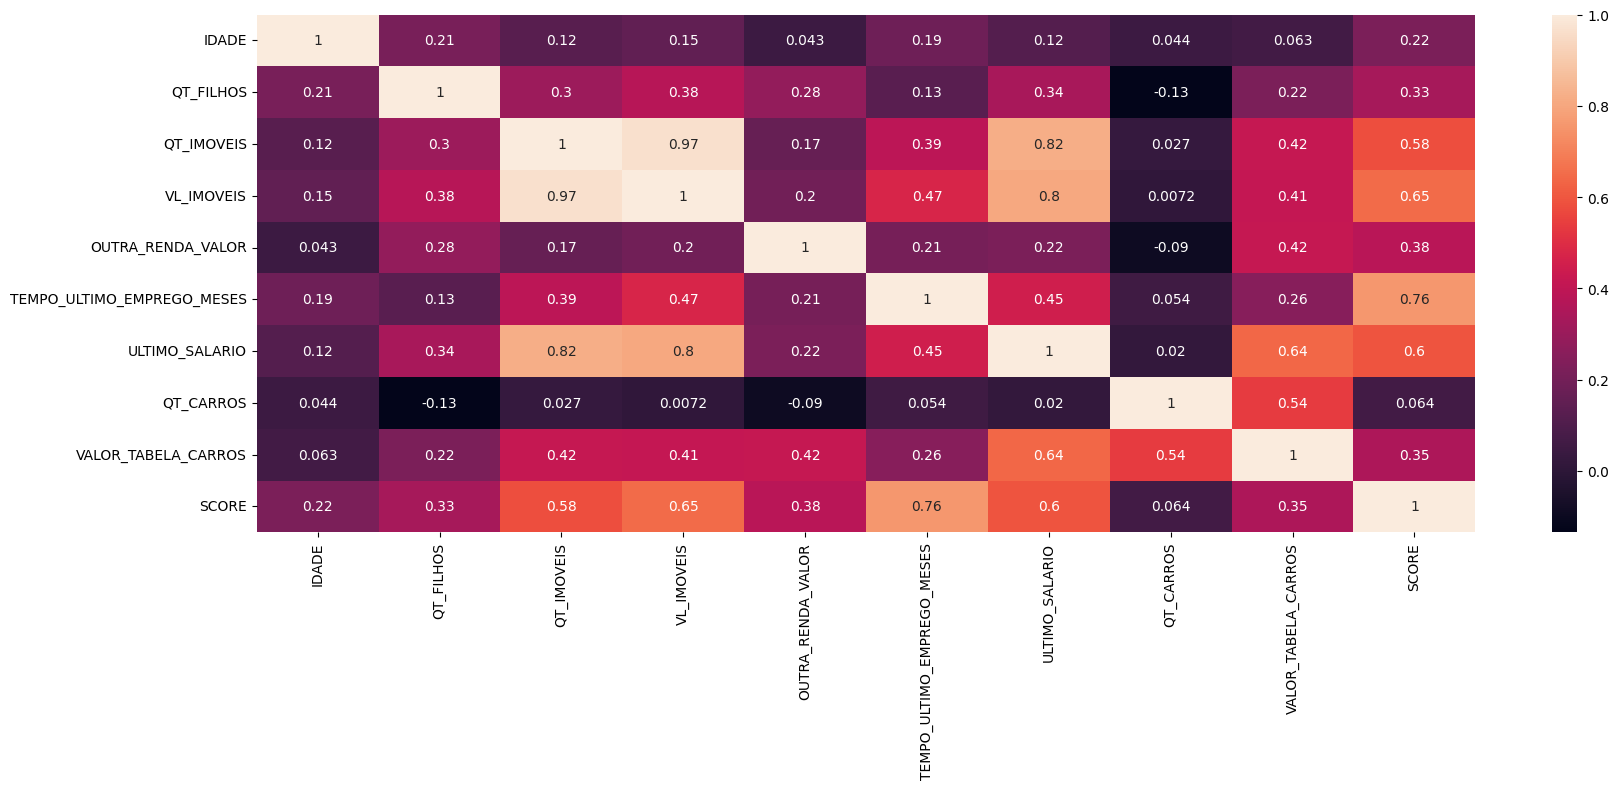

In [84]:
#Criando um heatmap para analisar a correção entre as variáveis
plt.rcParams["figure.figsize"] = (18, 8)
ax = sns.heatmap(df_dados[variaveis_numericas].corr(), annot=True)


Separei algumas variáveis que possuem uma correlação mais alta para analisar no detalhe com um gráfico de dispersão

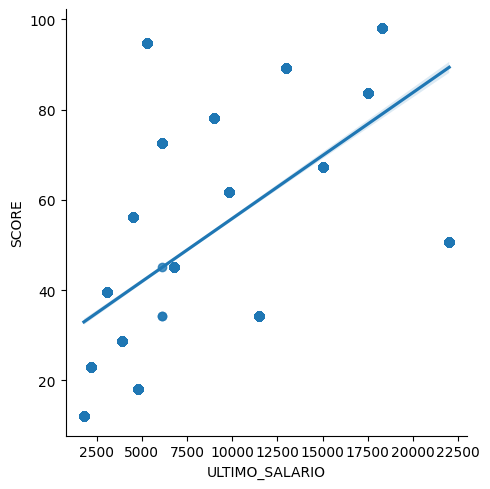

In [85]:
sns.lmplot(x= 'ULTIMO_SALARIO', y= 'SCORE', data = df_dados);

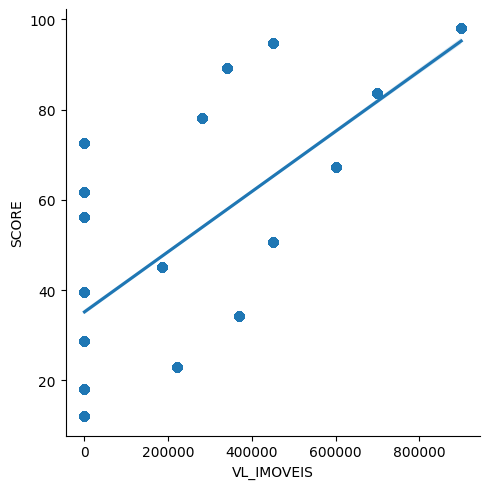

In [86]:
sns.lmplot(x= 'VL_IMOVEIS', y= 'SCORE', data = df_dados)

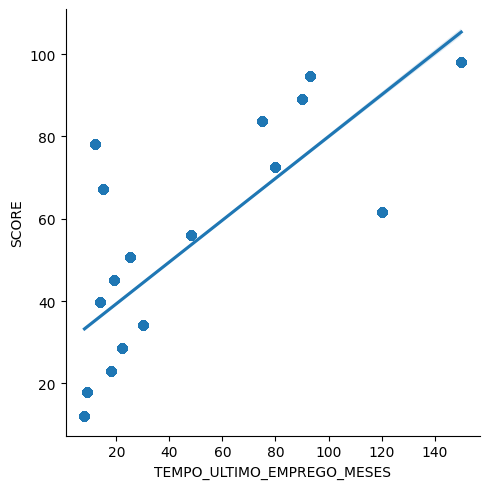

In [87]:
sns.lmplot(x='TEMPO_ULTIMO_EMPREGO_MESES', y='SCORE', data = df_dados)

Nos 3 gráficos é possível notar uma correlação positiva forte, o que leva a crer que as variáveis "TEMPO_ULTIMO_EMPREGO_MESES" , "VL_IMOVEIS", "ULTIMO_SALARIO" tem grande importância na construção do score e para o modelo preditivo que será criado.
Existem diversas outras correlações que podem ser exploradas, como por exemplo ULTIMO_SALARIO x QT_IMOVEIS

Processo de normalização dos dados

In [88]:
#Apartir da variável idade será criado uma faixa etária para que os dados fiquem mais próximos de uma normalização, com isso primeiramente será necessário verificar a MIN e MAX idades
print('menor_idade:', df_dados['IDADE'].min())
print('maior_dade:', df_dados['IDADE'].max())

menor_idade: 19
maior_dade: 65


In [89]:
#Engenharia de atributos
#Consiste em criar variáveis que serão mais relevantes e adequadas para o treinamento do modelo
idade_bins = [0, 30 , 40 , 50 ,60,70] #criando separações das faixas
categoria_idade = ["até 30","31 a 40","41 a 50","51 a 60","maior que 60"] #Criando as classificações de idade

df_dados["FAIXA_ETARIA"] = pd.cut(df_dados["IDADE"],idade_bins, labels=categoria_idade) #Criando a variável "FAIXA_ETARIA", imputando os dados da variavel idade, separando pelos bins e classificando pela faixa

df_dados["FAIXA_ETARIA"].value_counts() #Verificando como ficou a distribuição das faixas de idade

FAIXA_ETARIA
até 30          3552
51 a 60         2448
41 a 50         2070
31 a 40         1270
maior que 60    1134
Name: count, dtype: int64

In [90]:
#Verificando se depois do step anterior existe algum registro null
df_dados.isnull().sum()

UF                            0
IDADE                         0
ESCOLARIDADE                  0
ESTADO_CIVIL                  0
QT_FILHOS                     0
CASA_PROPRIA                  0
QT_IMOVEIS                    0
VL_IMOVEIS                    0
OUTRA_RENDA                   0
OUTRA_RENDA_VALOR             0
TEMPO_ULTIMO_EMPREGO_MESES    0
TRABALHANDO_ATUALMENTE        0
ULTIMO_SALARIO                0
QT_CARROS                     0
VALOR_TABELA_CARROS           0
SCORE                         0
FAIXA_ETARIA                  0
dtype: int64

In [91]:
#Verificando a media do SCORE para as FAIXAS ETARIAS
df_dados.groupby("FAIXA_ETARIA")["SCORE"].mean()

FAIXA_ETARIA
até 30          44.762950
31 a 40         48.883202
41 a 50         51.440177
51 a 60         56.123775
maior que 60    61.595238
Name: SCORE, dtype: float64

É notável que o SCORE é maior para a fatia de idade "Maior que 60", é interessante olhar quais outras variáveis são semelhantes para esse grupo.

Analisando as variaveis categoricas

In [92]:
#Separando as variáveis tipo object e category em uma lista para depois plotá-las
variaveis_categoricas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'object'  or df_dados.dtypes[i] == 'category':
           print(i, ':' , df_dados.dtypes[i])
           variaveis_categoricas.append(i)


UF : object
ESCOLARIDADE : object
ESTADO_CIVIL : object
CASA_PROPRIA : object
OUTRA_RENDA : object
TRABALHANDO_ATUALMENTE : object
FAIXA_ETARIA : category


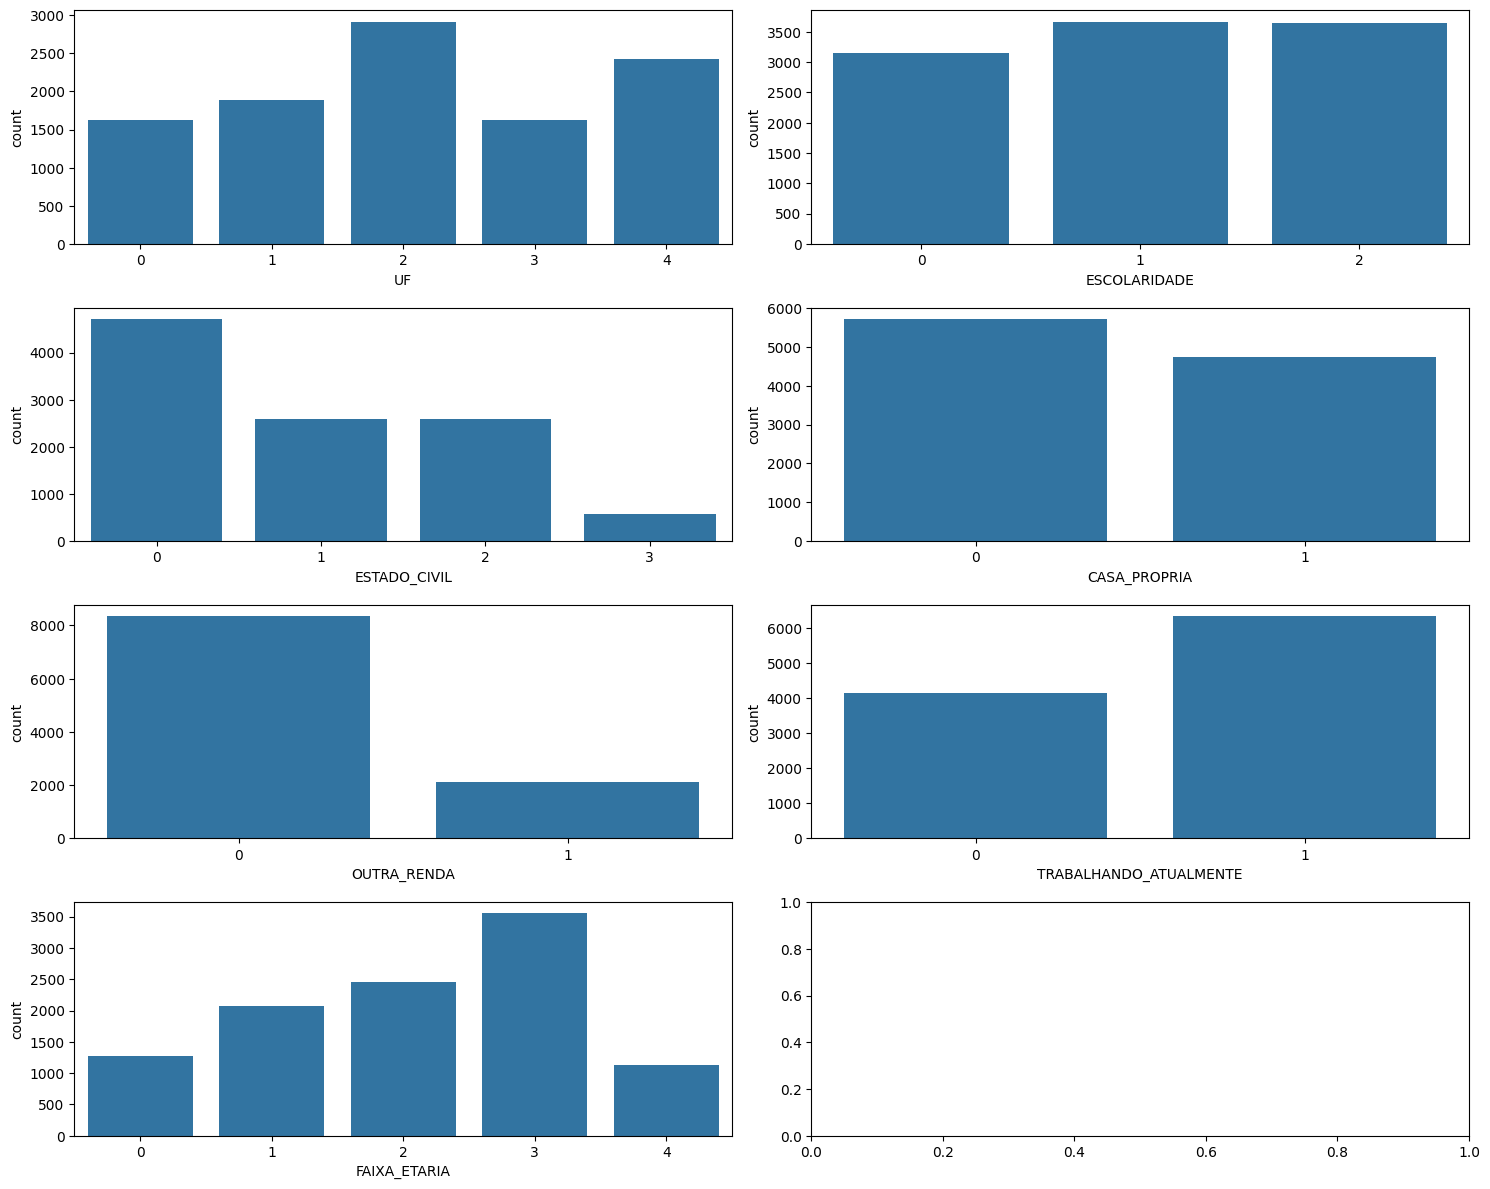

In [105]:
#Plotando todos gráficos das variáveis categorias de uma vez
plt.rcParams["figure.figsize"] = [15.00, 12.00]
plt.rcParams["figure.autolayout"] = True

f, axes=plt.subplots(4,2) #plotar em 4 linhas e duas colunas

linha = 0 
coluna = 0

for i in variaveis_categoricas:
    sns.countplot(data = df_dados, x=i, ax=axes[linha][coluna])
    coluna +=1
    if coluna ==2:
       linha += 1
       coluna = 0
plt.show() 

Etapa de pré-processamento dos dados

In [106]:
#Criar o encoder
lb = LabelEncoder()

#aplicando o encoder(tranformando em um código númerico) as variveis categorias para que possam ser usadas no modelo posteriormente
df_dados['FAIXA_ETARIA'] = lb.fit_transform(df_dados['FAIXA_ETARIA'])
df_dados['OUTRA_RENDA'] = lb.fit_transform(df_dados['OUTRA_RENDA'])
df_dados['TRABALHANDO_ATUALMENTE'] = lb.fit_transform(df_dados['TRABALHANDO_ATUALMENTE'])
df_dados['ESTADO_CIVIL'] = lb.fit_transform(df_dados['ESTADO_CIVIL'])
df_dados['CASA_PROPRIA'] = lb.fit_transform(df_dados['CASA_PROPRIA'])
df_dados['ESCOLARIDADE'] = lb.fit_transform(df_dados['ESCOLARIDADE'])
df_dados['UF'] = lb.fit_transform(df_dados['UF'])

#removendo valores nulos caso tenham sido gerados
df_dados.dropna(inplace = True)

In [107]:
#Exibindo os primeiros registros para verificar o resultado do step anterior
df_dados.head(5)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,SCORE,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,12.000000,3
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,18.000000,3
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,23.000000,3
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,28.666667,3
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,34.166667,3


In [118]:
#Verificando se todas as variáveis são numéricas 
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10474 entries, 0 to 10475
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UF                          10474 non-null  int64  
 1   IDADE                       10474 non-null  int64  
 2   ESCOLARIDADE                10474 non-null  int64  
 3   ESTADO_CIVIL                10474 non-null  int64  
 4   QT_FILHOS                   10474 non-null  int64  
 5   CASA_PROPRIA                10474 non-null  int64  
 6   QT_IMOVEIS                  10474 non-null  int64  
 7   VL_IMOVEIS                  10474 non-null  int64  
 8   OUTRA_RENDA                 10474 non-null  int64  
 9   OUTRA_RENDA_VALOR           10474 non-null  int64  
 10  TEMPO_ULTIMO_EMPREGO_MESES  10474 non-null  int64  
 11  TRABALHANDO_ATUALMENTE      10474 non-null  int64  
 12  ULTIMO_SALARIO              10474 non-null  float64
 13  QT_CARROS                   10474 no

Inicio do treinamento do modelo

In [119]:
#Separando variável alvo "SCORE"
alvo = df_dados.iloc[:,15:16]

In [120]:
#Separando variáveis preditoras
preditoras = df_dados.copy()
del preditoras['SCORE'] #Excluindo a variável alvo, pois já separamos a mesma na etapa anterior
preditoras.head(5)

,UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS,FAIXA_ETARIA
0,4,19,2,2,0,0,0,0,0,0,8,1,1800.0,0,0,3
1,0,23,1,2,1,0,0,0,0,0,9,0,4800.0,1,50000,3
2,3,25,0,0,0,1,1,220000,0,0,18,1,2200.0,2,30000,3
3,1,27,2,0,1,1,0,0,0,0,22,0,3900.0,0,0,3
4,2,28,1,1,2,0,1,370000,0,0,30,1,6100.0,1,35000,3


In [99]:
#Separar os dados em treino(70%) e teste(30%)
X_treino, X_teste, y_treino, y_teste = train_test_split(preditoras, alvo, test_size = 0.3, random_state = 40)

In [100]:
#Aplicando a normalização em treino e teste somente para as variáveis preditoras, deixando assim a variavel alvo sem nenhum tratamento
sc = MinMaxScaler()
X_treino_normalizados = sc.fit_transform(X_treino)
X_teste_normalizados = sc.transform(X_teste)

Criar, Avaliar e testar o modelo preditivo

In [101]:
#Treinar o modelo
modelo = LinearRegression()
modelo = modelo.fit(X_treino_normalizados, y_treino)

In [121]:
r2_score(y_teste, modelo.fit(X_treino_normalizados, y_treino).predict(X_teste_normalizados))

0.7975042047460088

O resultado é bem satisfatório de toda a base o modelo conseguiu uma acurácia de cerca de 79%.
Quanto mais próximo de 1 significa o quanto o modelo está conseguindo prever o score de crédito com base nos dados de treino.

Criando uma forma de imputar variáveis dinamicamente para testar o modelo

In [122]:
UF = 2
IDADE = 25                     
ESCOLARIDADE = 1              
ESTADO_CIVIL = 2              
QT_FILHOS = 1                 
CASA_PROPRIA = 1              
QT_IMOVEIS = 1               
VL_IMOVEIS = 500000               
OUTRA_RENDA = 0                
OUTRA_RENDA_VALOR = 0          
TEMPO_ULTIMO_EMPREGO_MESES = 36
TRABALHANDO_ATUALMENTE = 1    
ULTIMO_SALARIO = 7400            
QT_CARROS = 4                 
VALOR_TABELA_CARROS = 80000                        
FAIXA_ETARIA = 3

novos_dados = [UF,IDADE,ESCOLARIDADE,ESTADO_CIVIL,QT_FILHOS,CASA_PROPRIA,QT_IMOVEIS,VL_IMOVEIS,OUTRA_RENDA,OUTRA_RENDA_VALOR,TEMPO_ULTIMO_EMPREGO_MESES,TRABALHANDO_ATUALMENTE,ULTIMO_SALARIO,QT_CARROS,VALOR_TABELA_CARROS                       
,FAIXA_ETARIA]

In [104]:
X = np.array(novos_dados).reshape(1, -1)
X = sc.transform(X)

#Previsão
print("Score de crédito previsto para esse cliente:",modelo.predict(X))

Score de crédito previsto para esse cliente: [[70.78737239]]
